## Introduction

The old Bell telphone ringtone was a two second tone composed of the frequencies 400 Hz and 480 Hz. The tone was followed by a four second pause, and then repeated.  This ringtone continues to be used in the US with most mobile/landline carriers, and PBX systems.  Read more about this, and other international ringtones, at [https://en.wikipedia.org/wiki/Ringing_tone](https://en.wikipedia.org/wiki/Ringing_tone).

Here is a recording of the US ringtone.

In [1]:
from IPython.display import Audio

Audio(url="https://upload.wikimedia.org/wikipedia/commons/c/cd/US_ringback_tone.ogg")

Let's start with some basics before jumping into recreating this ringtone.  

## Basics of audio frequencies

The [sound](https://en.wikipedia.org/wiki/Sound) we hear is produced by [longitudinal pressure waves](https://en.wikipedia.org/wiki/Longitudinal_wave) in air particles.  These waves cause your ear drum to vibrate.  A [pure tone](https://en.wikipedia.org/wiki/Pure_tone) is produced when you hear an unchanging frequency with a [sinusoidal waveform](https://en.wikipedia.org/wiki/Sine_wave). 

The basic equation of a sinusoidal waveform:

$y(t) = 
    sin
    \left({
        2 \pi f t
    }\right)$

Where, $t$ is the time value, and $f$ = wave frequency ([Hertz](https://en.wikipedia.org/wiki/Hertz)).

### Symbolic equations in Python

If you are exploring a problem it can be helpful to start with [symbolic computation](https://reference.wolfram.com/language/tutorial/AlgebraicCalculations.html).  The [Sympy package](https://www.sympy.org/) in Python allows you to operate on and simplify algebraic equations.  Then, when you are ready, you can easily convert your equations into numerical form (e.q., a Numpy array).

Define sinusoidal waveform equation as a symbolic equation.

In [2]:
import sympy as s

# Define variables as Sympy symbols
t, f = s.symbols('t f')

# Define Sympy equation
y = s.sin(2*s.pi*t*f)

In [3]:
# Use pretty print (pprint) to diplay this equation 
s.pprint(y)

sin(2⋅π⋅f⋅t)


### Musical notes

Let's use $f_1=256$Hz (Middle-c), and $f_2=440$Hz (The [A note above middle-c](https://en.wikipedia.org/wiki/A440_(pitch_standard))).

In [4]:
# Substitue values f1 and f2 in the equation for y
y_at_256_hz = y.subs(f, 256)
y_at_440_hz = y.subs(f, 440)

In [5]:
# Show the new equations
s.pprint(y_at_256_hz)
s.pprint(y_at_440_hz)

sin(512⋅π⋅t)
sin(880⋅π⋅t)


### Plot Middle-C and A-440 on a graph

Let's plot these example frequencies together on a graph.  Note that we don't have to transform our equations into numerical lists before plotting them.  Sympy does this for us.  We just need to provide a plot range.

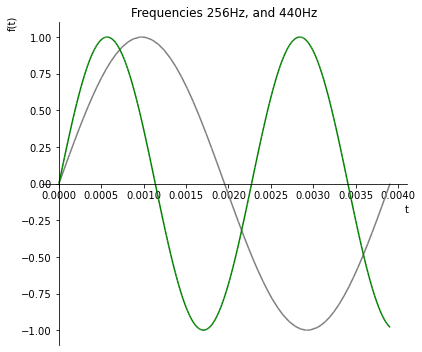

In [6]:
plot_range = (t, 0, 1/256)

# Plot the curve for middle-c
p = s.plot(
    y_at_256_hz, plot_range, 
    line_color='gray',
    title=f'Frequencies 256Hz, and 440Hz',
    show=False)

# Add the curve for A-440 to the graph
p.extend(s.plot(
    y_at_440_hz, plot_range, 
    line_color='green',
    show=False, adaptive=False))

# Format the graph and display it
p.size = (6,5)
p.show()

### Convert Sympy equations to numeric lists

In order to listen to these two notes we need to convert the equations into numerical time series.

In [7]:
# Convert our Sympy equations into 
# Python lambda functions
lambda_y_256 = s.lambdify(t, y_at_256_hz)
lambda_y_440 = s.lambdify(t, y_at_440_hz)

In [8]:
# Define numberic values for f1, and f2
f_256, f_440 = (256, 440)
# Number of samples per cycle
n = 50
# Number of seconds of play time
play_time = 3
# Sampling period in micro-seconds
t_256_delta = int(1e6/n/f_256)
t_440_delta = int(1e6/n/f_440) 
# Total play time in micro-seconds
t_max = int(play_time*1e6)

In [9]:
# Iterators for each time series
ts_256_range = range(0, t_max, t_256_delta)
ts_440_range = range(0, t_max, t_440_delta)

# Generate numeric lists from lambda
# functions.  Note: time (t) values have 
# to be converted back into seconds.
ts_256 = [lambda_y_256(t/1e6) 
          for t 
          in ts_256_range]
ts_440 = [lambda_y_440(t/1e6) 
           for t 
           in ts_440_range]

### Play sounds for Middle-C and A-440

In [10]:
Audio(ts_256, rate=f_256*n)

In [11]:
Audio(ts_440, rate=f_440*n)

## Recreate the US ringtone

In the United States, the ringtone for phones has historically been a two second tone composed of the frequencies 400 Hz and 480 Hz. The tone is followed by a four second pause, and then repeated until somebody answers.

### Acustic Equations

When multiple sound waves overlap, their amplitudes add together. This is called [superposition](https://en.wikipedia.org/wiki/Superposition_principle).

$y_{super}(t) = 
    sin
    \left({
        2 \pi f_1 t
    }\right)
    +
    sin
    \left({
        2 \pi f_2 t
    }\right)$

Where, the [beat frequency](https://en.wikipedia.org/wiki/Beat_(acoustics)) ($f_{beat}$) is defined as 

$f_{beat} = \lvert f_1 - f_2 \rvert$,

and the beat waveform equation ($y_{beat}$) is defined as

$y_{beat}(t) = 
    2 \cdot
    cos
    \left({
        2 \pi f_{beat} t
    }\right)$

In [12]:
# Define variables as Sympy symbols
t, f = s.symbols('t f')

# Define Sympy equations
y = s.sin(2*s.pi*t*f)
y_beat = 2*s.cos(s.pi*t*f)

In [13]:
# Define the two numeric frequencies
f1 = 400
f2 = 440
# Calculate beat frequency
f_beat = abs(f1-f2)

# Substitute in the numeric values
y_super = y.subs(f, f1) + y.subs(f, f2)
y_beat = y_beat.subs(f, f_beat)

In [14]:
# Pretty print the simplified equations
s.pprint(y_super)
s.pprint(y_beat)

sin(800⋅π⋅t) + sin(880⋅π⋅t)
2⋅cos(40⋅π⋅t)


### Plot superpositioned waveforms on a graph

Plot the superpositioned frequencies along with the curve for the beat frequency.

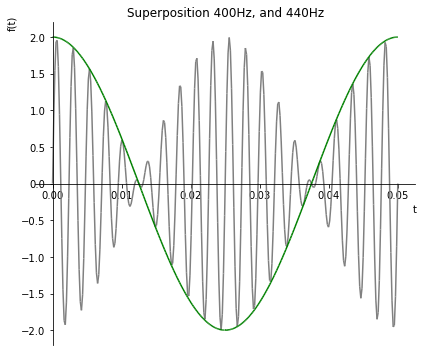

In [15]:
plot_range = (t, 0, 2/f_beat)

# Plot the superpositioned waveform in gray
p = s.plot(
    y_super, plot_range, line_color='gray',
    title=f'Superposition {f1}Hz, and {f2}Hz',
    show=False, adaptive=False)

# Plot, on the same graph, the beat frequency 
# function in green.
p.extend(
    s.plot(y_beat, plot_range, 
           line_color='green', 
           show=False, adaptive=False))
p.size = (6,5)
p.show()

Define a Numpy array as a time series of values from the symbolic equation $y_{super}(t)$.  Then we can feed the arry into the Audio function, and listen to it.

### Convert Sympy equations to numeric lists

In [16]:
# Create a numpy array from y_super
y_ringtone = s.lambdify(t, y_super)

# Period of the maximum frequency
T_max = 1/max(f1,f2)
n = 50 # Number of samples per cycle
play_time = 2 # Number of seconds of play time

# sampling period
t_delta = int(1e6*T_max/n)  # micro-seconds
# total play time
t_max = int(play_time*1e6)  # micro-seconds

# Create the time series as a list
ts_ringtone = [
   y_ringtone(t/1e6) 
   for t 
   in range(0,t_max, t_delta)]

pause_4sec = [
    0.0
    for t 
    in range(0,2*t_max,t_delta)]

### Play the ringtone sound

In [17]:
audio_sampling_rate = max(f1,f2)*n

print('audio_sampling_rate =', 
      audio_sampling_rate, 'Hz')

audio_sampling_rate = 22000 Hz


In [18]:
Audio(ts_ringtone + pause_4sec + ts_ringtone, 
      rate=audio_sampling_rate)